In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
part1 = pd.read_csv('train.csv')
part2 = pd.read_csv('test.csv')
house = pd.concat([part1, part2], axis = 0)

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
isnu = pd.DataFrame(house.isnull().sum(), columns = ['null_values'])

In [5]:
house.shape

(2919, 81)

In [6]:
isnu

,null_values
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [7]:
isnu.iloc[1:40]

,null_values
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
Alley,2721
LotShape,0
LandContour,0
Utilities,2
LotConfig,0


### First Fix the numerical missing values.....

In [8]:
numerical = house.select_dtypes(int)

In [9]:
numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,856,854,0,...,0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,1262,0,0,...,1,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,920,866,0,...,1,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,961,756,0,...,1,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,546,546,0,...,0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,546,546,0,...,0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224,0,0,...,1,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,970,0,0,...,0,80,32,0,0,0,0,700,7,2006


In [10]:
categorical = house.select_dtypes(object)

In [11]:
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [12]:
floating = house.select_dtypes(float)

In [13]:
floating

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0,NaN
1455,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0,NaN
1456,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0,NaN
1457,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0,NaN


In [14]:
43 + 26 + 12 # OK, matching

81

In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
numerical.isnull().sum() # we dont have any missing values in numerical datasets. 

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [17]:
floating.isnull().sum()

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [18]:
floating.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0


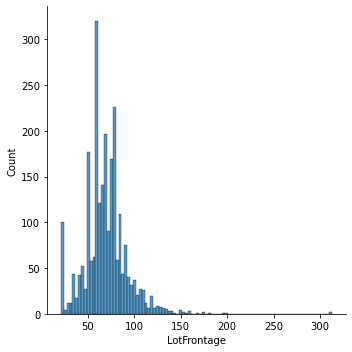

In [19]:
sns.displot(house.LotFrontage) # our data is right skewed.
# our data is missing at random so we use end of distribution imputation

In [20]:
ext = house.LotFrontage.mean()+3*house.LotFrontage.std()

In [21]:
def impute(data, variable, extreme ):
    data[variable+'1'] = data[variable].fillna(extreme) # this is the function.

In [22]:
impute(floating, 'LotFrontage', ext)

In [23]:
floating.LotFrontage1.isnull().sum()

0

In [24]:
floating.drop('LotFrontage', axis =1, inplace = True)

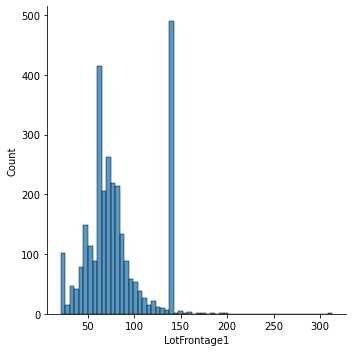

In [25]:
sns.displot(floating.LotFrontage1)

In [26]:
floating.isnull().sum()

MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
LotFrontage1       0
dtype: int64

In [27]:
floating.head()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice,LotFrontage1
0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0,65.0
1,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0,80.0
2,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0,68.0
3,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0,60.0
4,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0,84.0


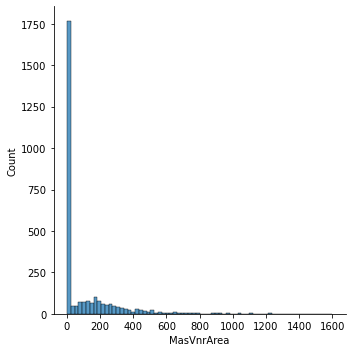

In [28]:
sns.displot(floating.MasVnrArea) # Right Skewed

In [29]:
ext = house.MasVnrArea.mean()+3*house.MasVnrArea.std()
def impute(data, variable, extreme ):
    data[variable+'1'] = data[variable].fillna(extreme)
impute(floating, 'MasVnrArea', ext)



In [30]:
floating.drop('MasVnrArea', axis =1, inplace = True)

In [31]:
floating.isnull().sum()

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
LotFrontage1       0
MasVnrArea1        0
dtype: int64

In [32]:
floating.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice,LotFrontage1,MasVnrArea1
0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0,65.0,196.0
1,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0,80.0,0.0
2,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0,68.0,162.0
3,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0,60.0,0.0
4,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0,84.0,350.0


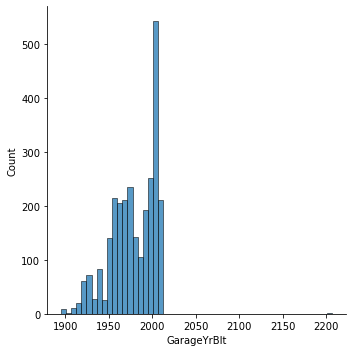

In [33]:
sns.displot(floating.GarageYrBlt)

In [34]:
ext = house.GarageYrBlt.mean()
def impute(data, variable, extreme ):
    data[variable+'1'] = data[variable].fillna(extreme)
impute(floating, 'GarageYrBlt', ext)
floating.drop('GarageYrBlt', axis =1, inplace = True)



In [35]:
floating.isnull().sum()

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
GarageArea         1
SalePrice       1459
LotFrontage1       0
MasVnrArea1        0
GarageYrBlt1       0
dtype: int64

In [36]:
change = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
          'BsmtHalfBath', 'GarageCars', 'GarageArea']
for i in change:
    ext = house[i].mean()
    def impute(data, variable, extreme ):
        data[variable+'1'] = data[variable].fillna(extreme)
    impute(floating, i, ext)
    

In [37]:
floating.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
          'BsmtHalfBath', 'GarageCars', 'GarageArea'], axis = 1, inplace = True)

In [38]:
floating.isnull().sum()

SalePrice        1459
LotFrontage1        0
MasVnrArea1         0
GarageYrBlt1        0
BsmtFinSF11         0
BsmtFinSF21         0
BsmtUnfSF1          0
TotalBsmtSF1        0
BsmtFullBath1       0
BsmtHalfBath1       0
GarageCars1         0
GarageArea1         0
dtype: int64

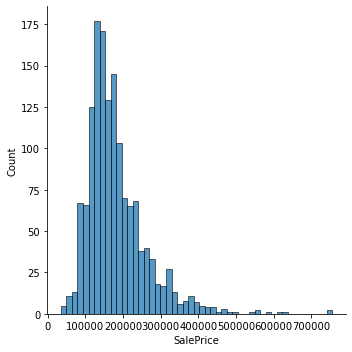

In [39]:
sns.displot(floating.SalePrice)

In [40]:
floating.shape

(2919, 12)

In [41]:
ext = house.SalePrice.mean()
def impute(data, variable, extreme ):
    data[variable+'1'] = data[variable].fillna(extreme)
impute(floating, 'SalePrice', ext)
floating.drop('SalePrice', axis =1, inplace = True)

In [42]:
floating.isnull().sum()

LotFrontage1     0
MasVnrArea1      0
GarageYrBlt1     0
BsmtFinSF11      0
BsmtFinSF21      0
BsmtUnfSF1       0
TotalBsmtSF1     0
BsmtFullBath1    0
BsmtHalfBath1    0
GarageCars1      0
GarageArea1      0
SalePrice1       0
dtype: int64

In [43]:
final_data = pd.concat([numerical, floating], axis = 1)

In [44]:
final_data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
LotFrontage1     0
MasVnrArea1      0
GarageYrBlt1     0
BsmtFinSF11      0
BsmtFinSF21      0
BsmtUnfSF1       0
TotalBsmtSF1     0
BsmtFullBath1    0
BsmtHalfBath1    0
GarageCars1      0
GarageArea1      0
SalePrice1       0
dtype: int64

In [45]:
final_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageYrBlt1,BsmtFinSF11,BsmtFinSF21,BsmtUnfSF1,TotalBsmtSF1,BsmtFullBath1,BsmtHalfBath1,GarageCars1,GarageArea1,SalePrice1
0,1,60,8450,7,5,2003,2003,856,854,0,...,2003.0,706.0,0.0,150.0,856.0,1.0,0.0,2.0,548.0,208500.0
1,2,20,9600,6,8,1976,1976,1262,0,0,...,1976.0,978.0,0.0,284.0,1262.0,0.0,1.0,2.0,460.0,181500.0
2,3,60,11250,7,5,2001,2002,920,866,0,...,2001.0,486.0,0.0,434.0,920.0,1.0,0.0,2.0,608.0,223500.0
3,4,70,9550,7,5,1915,1970,961,756,0,...,1998.0,216.0,0.0,540.0,756.0,1.0,0.0,3.0,642.0,140000.0
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,2000.0,655.0,0.0,490.0,1145.0,1.0,0.0,3.0,836.0,250000.0


In [46]:
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [47]:
categorical.isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [48]:
categorical.shape

(2919, 43)

In [49]:
categorical.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 
                 'Alley'], axis = 1, inplace = True)

In [50]:
categorical.isnull().sum()

MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [51]:
categorical.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [52]:
categorical.MSZoning = categorical.MSZoning.fillna('RL')

In [53]:
categorical.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [54]:
categorical.Utilities = categorical.Utilities.fillna('RAllPubL')

In [55]:
categorical.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [56]:
categorical.Exterior1st = categorical.Exterior1st.fillna('VinylSd')

In [57]:
categorical.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [58]:
categorical.Exterior2nd = categorical.Exterior2nd.fillna('VinylSd')

In [59]:
categorical.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType        24
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [60]:
categorical.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [61]:
categorical.MasVnrType = categorical.MasVnrType.fillna('BrkFace')

In [62]:
categorical.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [63]:
categorical.BsmtQual = categorical.BsmtQual.fillna('TA')

In [64]:
categorical.BsmtCond.value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [65]:
categorical.BsmtCond = categorical.BsmtCond.fillna('TA')

In [66]:
categorical.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [67]:
categorical.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [68]:
categorical.BsmtExposure = categorical.BsmtExposure.fillna('NO')

In [69]:
categorical.BsmtFinType1.value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [70]:
categorical.BsmtFinType1 = categorical.BsmtFinType1.fillna('Unf')

In [71]:
categorical.BsmtFinType2.value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [72]:
categorical.BsmtFinType2 = categorical.BsmtFinType2.fillna('Unf')

In [73]:
categorical.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [74]:
categorical.Electrical = categorical.Electrical.fillna('SBrkr')

In [75]:
categorical.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [76]:
categorical.KitchenQual = categorical.KitchenQual.fillna('SBrkr')

In [77]:
categorical.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

In [78]:
categorical.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [79]:
categorical.Functional = categorical.Functional.fillna('Typ')

In [80]:
categorical.GarageType.value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [81]:
categorical.GarageType = categorical.GarageType.fillna('Attchd')

In [82]:
categorical.GarageFinish.value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [83]:
categorical.GarageFinish = categorical.GarageFinish.fillna('Unf')

In [84]:
categorical.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [85]:
categorical.GarageQual = categorical.GarageQual.fillna('TA')

In [86]:
categorical.GarageCond.value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [87]:
categorical.GarageCond = categorical.GarageCond.fillna('TA')

In [88]:
categorical.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [89]:
categorical.SaleType = categorical.SaleType.fillna('WD')

In [90]:
categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [91]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


## Let's  do encoding to our data. 

In [92]:
len(categorical.columns)

38

In [93]:
categorical.MSZoning.value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()

In [95]:
cga = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [96]:
for i in cga:
    categorical[i+'1'] = ln.fit_transform(categorical[i])
    

In [97]:
categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,4,2,6,1,1,4,4,2,8,4
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,4,4,6,1,1,4,4,2,8,4
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,4,2,6,1,1,4,4,2,8,4
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,4,2,6,5,2,4,4,2,8,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,4,2,6,1,1,4,4,2,8,4


In [98]:
categorical.drop(cga,axis = 1, inplace = True)

In [99]:
categorical.head()

,MSZoning1,Street1,LotShape1,LandContour1,Utilities1,LotConfig1,LandSlope1,Neighborhood1,Condition11,Condition21,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,4,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [100]:
categorical.columns

Index(['MSZoning1', 'Street1', 'LotShape1', 'LandContour1', 'Utilities1',
       'LotConfig1', 'LandSlope1', 'Neighborhood1', 'Condition11',
       'Condition21', 'BldgType1', 'HouseStyle1', 'RoofStyle1', 'RoofMatl1',
       'Exterior1st1', 'Exterior2nd1', 'MasVnrType1', 'ExterQual1',
       'ExterCond1', 'Foundation1', 'BsmtQual1', 'BsmtCond1', 'BsmtExposure1',
       'BsmtFinType11', 'BsmtFinType21', 'Heating1', 'HeatingQC1',
       'CentralAir1', 'Electrical1', 'KitchenQual1', 'Functional1',
       'GarageType1', 'GarageFinish1', 'GarageQual1', 'GarageCond1',
       'PavedDrive1', 'SaleType1', 'SaleCondition1'],
      dtype='object')

In [101]:
final_data = pd.concat([final_data, categorical], axis = 1)

In [102]:
final_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
0,1,60,8450,7,5,2003,2003,856,854,0,...,4,2,6,1,1,4,4,2,8,4
1,2,20,9600,6,8,1976,1976,1262,0,0,...,4,4,6,1,1,4,4,2,8,4
2,3,60,11250,7,5,2001,2002,920,866,0,...,4,2,6,1,1,4,4,2,8,4
3,4,70,9550,7,5,1915,1970,961,756,0,...,4,2,6,5,2,4,4,2,8,0
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,4,2,6,1,1,4,4,2,8,4


In [103]:
final_data.isnull().sum().head(40)

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
LotFrontage1     0
MasVnrArea1      0
GarageYrBlt1     0
BsmtFinSF11      0
BsmtFinSF21      0
BsmtUnfSF1       0
TotalBsmtSF1     0
BsmtFullBath1    0
BsmtHalfBath1    0
GarageCars1      0
GarageArea1      0
SalePrice1       0
MSZoning1        0
Street1          0
dtype: int64

In [104]:
final_data.isnull().sum().tail(40)

GarageArea1       0
SalePrice1        0
MSZoning1         0
Street1           0
LotShape1         0
LandContour1      0
Utilities1        0
LotConfig1        0
LandSlope1        0
Neighborhood1     0
Condition11       0
Condition21       0
BldgType1         0
HouseStyle1       0
RoofStyle1        0
RoofMatl1         0
Exterior1st1      0
Exterior2nd1      0
MasVnrType1       0
ExterQual1        0
ExterCond1        0
Foundation1       0
BsmtQual1         0
BsmtCond1         0
BsmtExposure1     0
BsmtFinType11     0
BsmtFinType21     0
Heating1          0
HeatingQC1        0
CentralAir1       0
Electrical1       0
KitchenQual1      0
Functional1       0
GarageType1       0
GarageFinish1     0
GarageQual1       0
GarageCond1       0
PavedDrive1       0
SaleType1         0
SaleCondition1    0
dtype: int64

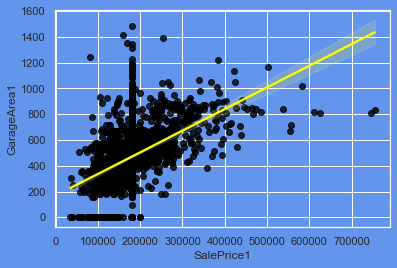

In [105]:

sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.regplot(final_data.SalePrice1, final_data.GarageArea1, color = 'red', line_kws = {'color': 'yellow'},
           scatter_kws = {'color': 'black'});

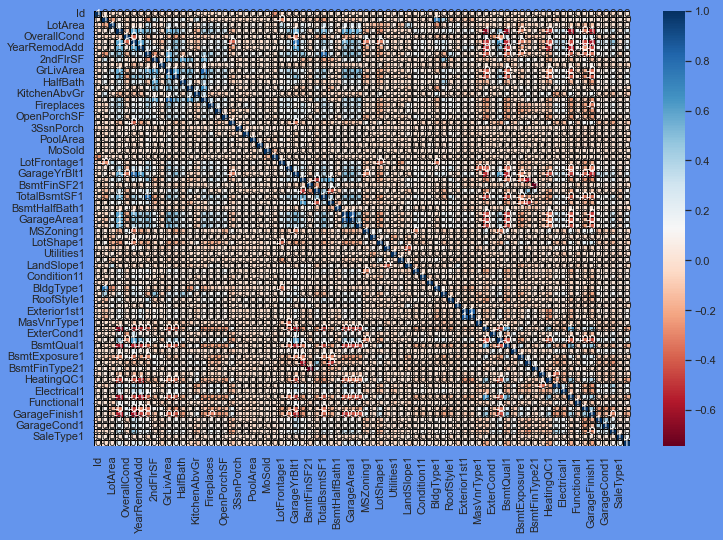

In [106]:
plt.figure(figsize = (12, 8))
sns.heatmap(final_data.corr(), annot = True, fmt = ".0f",
            cmap = 'RdBu', linewidth = 1, linecolor = 'black');

In [107]:
categorical.corr()

,MSZoning1,Street1,LotShape1,LandContour1,Utilities1,LotConfig1,LandSlope1,Neighborhood1,Condition11,Condition21,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
MSZoning1,1.000000,0.108450,0.096096,-0.032468,-0.001301,0.018972,0.015995,-0.261093,-0.028750,0.009528,...,-0.094667,0.171886,-0.057629,0.157631,0.168184,-0.136290,-0.080789,-0.088445,0.050374,-0.022739
Street1,0.108450,1.000000,-0.017584,0.093689,-0.190956,0.002236,-0.093744,0.014602,-0.064422,0.000631,...,0.021584,-0.032466,0.023578,-0.025548,-0.027782,0.010052,0.019467,0.109325,0.013090,0.016630
LotShape1,0.096096,-0.017584,1.000000,0.093485,-0.016370,0.190382,-0.087731,-0.048926,-0.112869,-0.026332,...,-0.126755,0.166348,-0.041259,0.204331,0.276000,-0.102714,-0.074982,-0.156045,-0.012027,-0.075485
LandContour1,-0.032468,0.093689,0.093485,1.000000,-0.042814,-0.011416,-0.369630,0.035323,0.026338,-0.001538,...,0.053434,0.035107,0.047160,-0.049100,-0.047903,0.035314,-0.006667,0.055984,-0.028146,0.037970
Utilities1,-0.001301,-0.190956,-0.016370,-0.042814,1.000000,-0.008770,-0.006674,-0.005373,-0.015554,-0.000303,...,-0.108599,0.018025,-0.084484,0.010232,0.021518,0.007208,0.005755,-0.036238,-0.059882,-0.016577
LotConfig1,0.018972,0.002236,0.190382,-0.011416,-0.008770,1.000000,0.011363,-0.052815,0.051662,0.035353,...,0.002104,0.005232,-0.020977,0.016090,0.045828,-0.005529,0.023215,-0.014873,-0.007382,0.034868
LandSlope1,0.015995,-0.093744,-0.087731,-0.369630,-0.006674,0.011363,1.000000,-0.094258,-0.013156,-0.021858,...,-0.007327,-0.014893,-0.079978,-0.016953,0.006673,-0.003214,-0.008219,0.001462,0.049169,-0.037448
Neighborhood1,-0.261093,0.014602,-0.048926,0.035323,-0.005373,-0.052815,-0.094258,1.000000,-0.008462,0.047892,...,0.061926,-0.172643,0.038709,-0.063081,-0.072105,0.018931,0.015372,0.029220,-0.012376,0.037446
Condition11,-0.028750,-0.064422,-0.112869,0.026338,-0.015554,0.051662,-0.013156,-0.008462,1.000000,-0.082828,...,0.096629,-0.066129,0.014814,-0.053824,-0.128921,0.059724,0.043930,0.100681,-0.026812,0.046572
Condition21,0.009528,0.000631,-0.026332,-0.001538,-0.000303,0.035353,-0.021858,0.047892,-0.082828,1.000000,...,0.009200,-0.058155,0.002521,0.010855,-0.034746,-0.000260,0.030659,0.000047,0.004161,0.053610


In [108]:
final_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
0,1,60,8450,7,5,2003,2003,856,854,0,...,4,2,6,1,1,4,4,2,8,4
1,2,20,9600,6,8,1976,1976,1262,0,0,...,4,4,6,1,1,4,4,2,8,4
2,3,60,11250,7,5,2001,2002,920,866,0,...,4,2,6,1,1,4,4,2,8,4
3,4,70,9550,7,5,1915,1970,961,756,0,...,4,2,6,5,2,4,4,2,8,0
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,4,2,6,1,1,4,4,2,8,4


In [109]:
final_data.drop('Id', axis =1 , inplace = True)

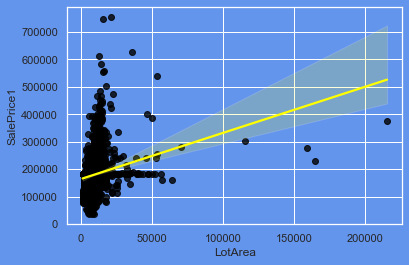

In [110]:
sns.regplot(final_data.LotArea, final_data.SalePrice1, color = 'red', line_kws = {'color': 'yellow'},
           scatter_kws = {'color': 'black'});

<AxesSubplot:xlabel='SalePrice1'>

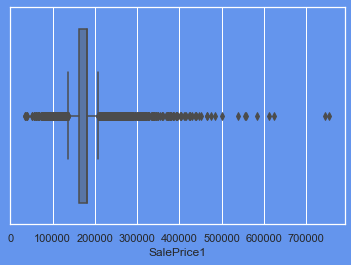

In [111]:
sns.boxplot(final_data.SalePrice1)

In [112]:
final_data.shape

(2919, 75)

<AxesSubplot:xlabel='SalePrice1'>

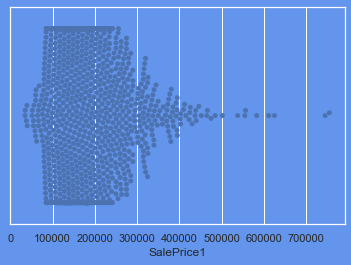

In [113]:
sns.swarmplot(final_data.SalePrice1)

In [114]:
final_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Electrical1,KitchenQual1,Functional1,GarageType1,GarageFinish1,GarageQual1,GarageCond1,PavedDrive1,SaleType1,SaleCondition1
0,60,8450,7,5,2003,2003,856,854,0,1710,...,4,2,6,1,1,4,4,2,8,4
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,4,4,6,1,1,4,4,2,8,4
2,60,11250,7,5,2001,2002,920,866,0,1786,...,4,2,6,1,1,4,4,2,8,4
3,70,9550,7,5,1915,1970,961,756,0,1717,...,4,2,6,5,2,4,4,2,8,0
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,4,2,6,1,1,4,4,2,8,4


In [115]:
final_data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'LotFrontage1', 'MasVnrArea1', 'GarageYrBlt1', 'BsmtFinSF11',
       'BsmtFinSF21', 'BsmtUnfSF1', 'TotalBsmtSF1', 'BsmtFullBath1',
       'BsmtHalfBath1', 'GarageCars1', 'GarageArea1', 'SalePrice1',
       'MSZoning1', 'Street1', 'LotShape1', 'LandContour1', 'Utilities1',
       'LotConfig1', 'LandSlope1', 'Neighborhood1', 'Condition11',
       'Condition21', 'BldgType1', 'HouseStyle1', 'RoofStyle1', 'RoofMatl1',
       'Exterior1st1', 'Exterior2nd1', 'MasVnrType1', 'ExterQual1',
       'ExterCond1', 'Foundation1', 'BsmtQual1', 'BsmtCond1', 'BsmtExposure1',
       'BsmtFinType11', 'BsmtFinType21', 'Heating1', '

In [116]:
df = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'LotFrontage1', 'MasVnrArea1', 'GarageYrBlt1', 'BsmtFinSF11',
       'BsmtFinSF21', 'BsmtUnfSF1', 'TotalBsmtSF1', 'BsmtFullBath1',
       'BsmtHalfBath1', 'GarageCars1', 'GarageArea1', ' ',
       'MSZoning1', 'Street1', 'LotShape1', 'LandContour1', 'Utilities1',
       'LotConfig1', 'LandSlope1', 'Neighborhood1', 'Condition11',
       'Condition21', 'BldgType1', 'HouseStyle1', 'RoofStyle1', 'RoofMatl1',
       'Exterior1st1', 'Exterior2nd1', 'MasVnrType1', 'ExterQual1',
       'ExterCond1', 'Foundation1', 'BsmtQual1', 'BsmtCond1', 'BsmtExposure1',
       'BsmtFinType11', 'BsmtFinType21', 'Heating1', 'HeatingQC1',
       'CentralAir1', 'Electrical1', 'KitchenQual1', 'Functional1',
       'GarageType1', 'GarageFinish1', 'GarageQual1', 'GarageCond1',
       'PavedDrive1', 'SaleType1', 'SaleCondition1']

In [117]:
X = final_data.drop('SalePrice1', axis = 1)
y = final_data.SalePrice1

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_tes, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [120]:
from sklearn.feature_selection import mutual_info_regression
reg = mutual_info_regression(X_train, y_train)

In [121]:
reg

array([1.35077261e-01, 8.75561229e-02, 2.71381100e-01, 4.45661657e-02,
       1.70230793e-01, 1.28997550e-01, 1.33881351e-01, 9.30212524e-02,
       1.95520266e-02, 2.27594851e-01, 1.02556299e-01, 2.74028984e-02,
       5.88876155e-02, 1.01385169e-02, 9.12752207e-02, 5.71815519e-02,
       4.32518374e-02, 6.53012307e-02, 1.94823703e-02, 0.00000000e+00,
       0.00000000e+00, 7.74744783e-03, 0.00000000e+00, 4.81002360e-04,
       1.27531590e-02, 1.28942969e-01, 3.02658688e-02, 1.22946770e-01,
       6.73783528e-02, 2.14407351e-03, 6.86479982e-02, 2.03945537e-01,
       0.00000000e+00, 5.23181997e-03, 1.89916698e-01, 1.73178203e-01,
       7.32283143e-02, 1.29749526e-02, 3.80507009e-02, 1.94611068e-02,
       1.81594764e-02, 0.00000000e+00, 2.10442061e-02, 2.53421415e-01,
       4.43615212e-03, 0.00000000e+00, 0.00000000e+00, 1.67961071e-02,
       1.86389249e-02, 0.00000000e+00, 6.52657557e-02, 6.54599678e-02,
       5.36950008e-02, 1.39499805e-01, 6.27088637e-03, 9.79089907e-02,
      

In [122]:
reg = pd.Series(reg)
reg.index = X_train.columns
reg.sort_values(ascending = False)
f_imp = pd.DataFrame(reg.sort_values(ascending = False))

In [123]:
f_imp.head(30)

,0
OverallQual,0.271381
Neighborhood1,0.253421
GrLivArea,0.227595
TotalBsmtSF1,0.203946
GarageCars1,0.189917
GarageArea1,0.173178
YearBuilt,0.170231
KitchenQual1,0.156071
BsmtQual1,0.155140
ExterQual1,0.139500


In [124]:
f_imp.tail(39)

,0
LotShape1,0.038051
BsmtExposure1,0.034648
MasVnrArea1,0.030266
HalfBath,0.027403
BsmtCond1,0.025272
Electrical1,0.025210
LandSlope1,0.021044
SaleCondition1,0.020985
LowQualFinSF,0.019552
EnclosedPorch,0.019482


In [125]:
from sklearn.feature_selection import SelectKBest

In [126]:
mut = SelectKBest(mutual_info_regression, k = 25)
mut.fit(X_train,y_train)

SelectKBest(k=25,
            score_func=<function mutual_info_regression at 0x000001CCB1770288>)

In [127]:
mut.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False])

In [128]:
mut.scores_

array([0.14430011, 0.08821918, 0.2715128 , 0.07659317, 0.16421545,
       0.10296849, 0.13638835, 0.0983244 , 0.01235487, 0.23499402,
       0.11912475, 0.06452182, 0.01497584, 0.03223233, 0.08587286,
       0.06940631, 0.04604748, 0.07238175, 0.01779098, 0.        ,
       0.00306048, 0.        , 0.01030676, 0.00270811, 0.        ,
       0.12874894, 0.0124724 , 0.11829873, 0.06758031, 0.00582951,
       0.06577341, 0.19420668, 0.        , 0.01125428, 0.16835129,
       0.16701271, 0.06443268, 0.00497136, 0.0229719 , 0.        ,
       0.        , 0.03240568, 0.00697735, 0.22597249, 0.0092766 ,
       0.00601826, 0.01444218, 0.06115492, 0.02407753, 0.0063434 ,
       0.06748195, 0.08023027, 0.03628154, 0.14693945, 0.01152964,
       0.08582855, 0.14653017, 0.        , 0.04645126, 0.07767426,
       0.01693821, 0.0073045 , 0.08229281, 0.02902182, 0.        ,
       0.13159588, 0.        , 0.02860272, 0.08725267, 0.        ,
       0.        , 0.01296473, 0.04044791, 0.02556041])

In [129]:
X_train.columns[mut.get_support()] # we can use this feature for model purpose

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'LotFrontage1', 'GarageYrBlt1', 'TotalBsmtSF1',
       'GarageCars1', 'GarageArea1', 'Neighborhood1', 'Exterior2nd1',
       'ExterQual1', 'Foundation1', 'BsmtQual1', 'BsmtFinType11', 'HeatingQC1',
       'KitchenQual1', 'GarageFinish1'],
      dtype='object')

In [130]:
train = final_data[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'LotFrontage1', 'GarageYrBlt1', 'BsmtUnfSF1',
       'TotalBsmtSF1', 'GarageCars1', 'GarageArea1', 'Neighborhood1',
       'Exterior2nd1', 'ExterQual1', 'Foundation1', 'BsmtQual1', 'HeatingQC1',
       'KitchenQual1', 'GarageFinish1']]

In [131]:
X = train
y = final_data.SalePrice1

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [133]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [134]:
X_train.shape

(2043, 25)

In [135]:
y_train.shape

(2043,)

In [136]:
X_test.shape

(876, 25)

In [137]:
y_test.shape

(876,)

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
import xgboost

# Linear Regression

In [139]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [140]:
lr.coef_ # slope value

array([-4543.85007286,  5322.6407056 , 10897.41370568,  3448.45488281,
        3111.33172816,  -378.74769738, -4527.32641352, -2494.5159729 ,
       14248.33184019,  1306.7504053 ,  2103.73269793, -2827.79137916,
       -2328.03246971, -2699.23719654,  4420.24348025,  1532.13587807,
        2822.81073006,   730.93228111, -1382.78646035, -1605.73569345,
        1513.73160419, -4446.00033521,  -542.31547192, -2910.03664274,
       -1934.95033403])

In [141]:
lr.intercept_ # intercept value 

180617.37803927882

In [142]:
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SalePrice1'>

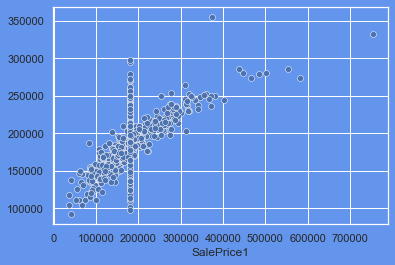

In [143]:
sns.scatterplot(y_test, pred)

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

2012390519.2469978
31583.06854003798
44859.67587095339


In [145]:
lr.score(X_train, y_train) # trainnig score

0.3954149921044414

In [146]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr, X, y, cv = 5)
print(cvs.mean())

-6.1398493389991334e+29


# Ridge

In [147]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [148]:
r = Ridge()
parameters = {'alpha': [1e-15, 1e-8, 1e-5, 1e-2, 5, 10, 20, 30, 50]}
ridge_reg = GridSearchCV(r, parameters, scoring = 'neg_mean_squared_error', cv = 10)
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-08, 1e-05, 0.01, 5, 10, 20, 30,
                                   50]},
             scoring='neg_mean_squared_error')

In [149]:
pred = ridge_reg.predict(X_test)

In [150]:
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

2010341903.0984619
31556.159062599832
44836.8364528371


# Lasso Regression

In [151]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
l = Lasso()
parameters = {'alpha': [1e-15, 1e-8, 1e-5, 1e-2, 5, 10, 20, 30, 50]}
lasso_reg = GridSearchCV(l, parameters, scoring = 'neg_mean_squared_error', cv = 25)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))


2011647097.4083257
31581.003625966292
44851.389024291384


# Decision Tree

In [152]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))


3827031721.6978374
37338.89786232564
61863.00770006125


### Hyper parameter Tunning 

In [153]:
params = { 
    'splitter': ['best', 'random'], 
    'max_depth': [2,3,5,3,56,456,7,5],
    'min_samples_leaf': [1,2,4,6,7],
    'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
    'max_features': ['auto', 'log2', 'sqrt', None], 
    'max_leaf_nodes': [None, 10, 20, 30, 50, 60]}
print(params)

{'splitter': ['best', 'random'], 'max_depth': [2, 3, 5, 3, 56, 456, 7, 5], 'min_samples_leaf': [1, 2, 4, 6, 7], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 50, 60]}


In [154]:
grid = GridSearchCV(dt, param_grid = params, scoring = 'neg_mean_squared_error', n_jobs = -1, 
                   cv = 20, verbose = 3)
grid.fit(X_train, y_train)
pred = grid.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

Fitting 20 folds for each of 7680 candidates, totalling 153600 fits
2496231504.8038025
33742.23230623634
49962.30083576819
0.31676357336603045


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

1976963701.2986915
31520.616740911362
44463.05996328516
0.4588908872189926


#### Hyper parameter for Random Forest 

In [156]:
# It's nothing but how many number of tree we want.
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 2000, num = 10) ]

# Number of features we consider at very split
max_features = ['auto','sqrt','log2']

# Maximum number of tree in each tree
max_depth = [ int(i) for i in np.linspace(10,1000,10)]

# Minimum number of sample required at each node
min_sample_split = [25, 10, 2, 5, 100]

# Minimum number of sample required at each leaf
min_sample_leaf = [1,2,4,6,8]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_sample_split,
              'min_samples_leaf': min_sample_leaf}

print(random_grid)



{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [25, 10, 2, 5, 100], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [157]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 10, 
                          cv = 3, verbose = 2, random_state = 100, n_jobs = -1)
rf_randomcv.fit(X_train, y_train)
pred = rf_randomcv.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
2002661745.6780295
31553.977394015183
44751.10887651869
0.45185714856958004


# XG Boost Regressor

In [158]:
import xgboost as xgb

x_reg = xgb.XGBRegressor()
x_reg.fit(X_train,y_train)
pred = x_reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))



2350615412.4734964
32560.405314132186
48483.1456536547
0.35661973990855644


In [159]:
score = cross_val_score(x_reg, X, y, cv = 10)
print(score.mean())

-6.496609145755673e+29


#### Hyperparametere optimization 


In [160]:
n_estimators = [ int(x) for x in np.linspace(100, 1200, 12) ]
learning_rate = ['0.01', '0.02', '0.05', '0.005', '0.00001']
max_depth = [ int(x) for x in np.linspace(6, 40 , 6)]
subsample = [0.6, 0.8, 0.1, 0.5]
min_child_weight = [3, 1, 7, 9]

In [161]:
random_grid = { 'n_estimators': n_estimators, 
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'subsample': subsample,
              'min_child_weight': min_child_weight}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.01', '0.02', '0.05', '0.005', '0.00001'], 'max_depth': [6, 12, 19, 26, 33, 40], 'subsample': [0.6, 0.8, 0.1, 0.5], 'min_child_weight': [3, 1, 7, 9]}


In [162]:
xg = RandomizedSearchCV(x_reg, param_distributions= random_grid, scoring = 'neg_mean_squared_error', 
                       n_iter = 10, cv = 5, verbose = 2, random_state = 43, n_jobs = -1)
xg.fit(X_train, y_train)
pred = xg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
2070205835.1225736
31359.46312997963
45499.51466908822
0.4333698479231751


###### let's try in nerual network 
## ANN

In [163]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [164]:
len(X.columns)

25

In [165]:
seq = Sequential()
seq.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train.shape[1]))
seq.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
seq.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
seq.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
seq.add(Dense(1,kernel_initializer = 'normal', activation = 'linear' )) # regression
seq.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model = seq.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, nb_epoch = 1000)


Train on 1368 samples, validate on 675 samples
Epoch 1/1000
1368/1368 [==============================] - 1s 533us/step - loss: 130445.5366 - mean_absolute_error: 130445.5078 - val_loss: 71075.6678 - val_mean_absolute_error: 71075.6562
Epoch 2/1000
1368/1368 [==============================] - 0s 318us/step - loss: 69117.4995 - mean_absolute_error: 69117.4922 - val_loss: 64749.6978 - val_mean_absolute_error: 64749.6992
Epoch 3/1000
1368/1368 [==============================] - 0s 301us/step - loss: 63992.8421 - mean_absolute_error: 63992.8438 - val_loss: 61097.2958 - val_mean_absolute_error: 61097.2969
Epoch 4/1000
1368/1368 [==============================] - 0s 289us/step - loss: 58632.1967 - mean_absolute_error: 58632.1914 - val_loss: 56713.4603 - val_mean_absolute_error: 56713.4688
Epoch 5/1000
1368/1368 [==============================] - 0s 360us/step - loss: 50544.4035 - mean_absolute_error: 50544.4102 - val_loss: 48852.6838 - val_mean_absolute_error: 48852.6758
Epoch 6/1000
1368/13

1368/1368 [==============================] - 0s 340us/step - loss: 28686.8819 - mean_absolute_error: 28686.8809 - val_loss: 29700.3825 - val_mean_absolute_error: 29700.3828
Epoch 44/1000
1368/1368 [==============================] - 0s 329us/step - loss: 28662.5606 - mean_absolute_error: 28662.5605 - val_loss: 29862.1803 - val_mean_absolute_error: 29862.1836
Epoch 45/1000
1368/1368 [==============================] - 0s 325us/step - loss: 28608.2784 - mean_absolute_error: 28608.2832 - val_loss: 28982.9309 - val_mean_absolute_error: 28982.9355
Epoch 46/1000
1368/1368 [==============================] - 0s 332us/step - loss: 28403.0805 - mean_absolute_error: 28403.0820 - val_loss: 29880.0355 - val_mean_absolute_error: 29880.0332
Epoch 47/1000
1368/1368 [==============================] - 0s 336us/step - loss: 28821.3873 - mean_absolute_error: 28821.3887 - val_loss: 29523.3374 - val_mean_absolute_error: 29523.3359
Epoch 48/1000
1368/1368 [==============================] - 1s 378us/step - loss

Epoch 87/1000
1368/1368 [==============================] - 0s 290us/step - loss: 28022.1342 - mean_absolute_error: 28022.1309 - val_loss: 29547.6704 - val_mean_absolute_error: 29547.6680
Epoch 88/1000
1368/1368 [==============================] - 0s 281us/step - loss: 28293.2062 - mean_absolute_error: 28293.2109 - val_loss: 29325.1961 - val_mean_absolute_error: 29325.1973
Epoch 89/1000
1368/1368 [==============================] - 0s 295us/step - loss: 28229.0962 - mean_absolute_error: 28229.1016 - val_loss: 29369.0926 - val_mean_absolute_error: 29369.0879
Epoch 90/1000
1368/1368 [==============================] - 0s 299us/step - loss: 27948.5308 - mean_absolute_error: 27948.5312 - val_loss: 30298.2040 - val_mean_absolute_error: 30298.1992
Epoch 91/1000
1368/1368 [==============================] - 0s 307us/step - loss: 28069.7470 - mean_absolute_error: 28069.7520 - val_loss: 29381.7519 - val_mean_absolute_error: 29381.7480
Epoch 92/1000
1368/1368 [==============================] - 0s 296

Epoch 131/1000
1368/1368 [==============================] - 0s 288us/step - loss: 27776.7649 - mean_absolute_error: 27776.7637 - val_loss: 30049.5011 - val_mean_absolute_error: 30049.5000
Epoch 132/1000
1368/1368 [==============================] - 0s 286us/step - loss: 27588.1169 - mean_absolute_error: 27588.1191 - val_loss: 29396.2422 - val_mean_absolute_error: 29396.2422
Epoch 133/1000
1368/1368 [==============================] - 0s 285us/step - loss: 27682.3264 - mean_absolute_error: 27682.3242 - val_loss: 30111.4953 - val_mean_absolute_error: 30111.4961
Epoch 134/1000
1368/1368 [==============================] - 0s 294us/step - loss: 27664.9029 - mean_absolute_error: 27664.9004 - val_loss: 29431.4183 - val_mean_absolute_error: 29431.4199
Epoch 135/1000
1368/1368 [==============================] - 0s 302us/step - loss: 27636.4759 - mean_absolute_error: 27636.4688 - val_loss: 29775.9118 - val_mean_absolute_error: 29775.9102
Epoch 136/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 296us/step - loss: 27194.4279 - mean_absolute_error: 27194.4238 - val_loss: 30561.9581 - val_mean_absolute_error: 30561.9609
Epoch 175/1000
1368/1368 [==============================] - 0s 321us/step - loss: 27379.8267 - mean_absolute_error: 27379.8223 - val_loss: 31781.8860 - val_mean_absolute_error: 31781.8848
Epoch 176/1000
1368/1368 [==============================] - 0s 301us/step - loss: 27576.5985 - mean_absolute_error: 27576.5938 - val_loss: 29821.2707 - val_mean_absolute_error: 29821.2773
Epoch 177/1000
1368/1368 [==============================] - 0s 299us/step - loss: 27169.2413 - mean_absolute_error: 27169.2461 - val_loss: 30409.5594 - val_mean_absolute_error: 30409.5586
Epoch 178/1000
1368/1368 [==============================] - 0s 334us/step - loss: 26961.2588 - mean_absolute_error: 26961.2598 - val_loss: 30195.7945 - val_mean_absolute_error: 30195.7930
Epoch 179/1000
1368/1368 [==============================] - 0s 352us/step -

Epoch 218/1000
1368/1368 [==============================] - 0s 277us/step - loss: 26413.0022 - mean_absolute_error: 26413.0078 - val_loss: 30595.9049 - val_mean_absolute_error: 30595.9102
Epoch 219/1000
1368/1368 [==============================] - 0s 262us/step - loss: 26513.3759 - mean_absolute_error: 26513.3750 - val_loss: 30119.1170 - val_mean_absolute_error: 30119.1113
Epoch 220/1000
1368/1368 [==============================] - 0s 298us/step - loss: 26770.1674 - mean_absolute_error: 26770.1719 - val_loss: 30076.3544 - val_mean_absolute_error: 30076.3535
Epoch 221/1000
1368/1368 [==============================] - 0s 289us/step - loss: 26337.5187 - mean_absolute_error: 26337.5195 - val_loss: 30572.1518 - val_mean_absolute_error: 30572.1543
Epoch 222/1000
1368/1368 [==============================] - 0s 262us/step - loss: 26250.6443 - mean_absolute_error: 26250.6484 - val_loss: 30714.2884 - val_mean_absolute_error: 30714.2910
Epoch 223/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 264us/step - loss: 26009.6176 - mean_absolute_error: 26009.6230 - val_loss: 30682.8126 - val_mean_absolute_error: 30682.8145
Epoch 262/1000
1368/1368 [==============================] - 0s 261us/step - loss: 26058.9222 - mean_absolute_error: 26058.9121 - val_loss: 30485.4602 - val_mean_absolute_error: 30485.4609
Epoch 263/1000
1368/1368 [==============================] - 0s 262us/step - loss: 25793.1569 - mean_absolute_error: 25793.1543 - val_loss: 30664.4704 - val_mean_absolute_error: 30664.4766
Epoch 264/1000
1368/1368 [==============================] - 0s 266us/step - loss: 25852.6718 - mean_absolute_error: 25852.6758 - val_loss: 30506.3986 - val_mean_absolute_error: 30506.4004
Epoch 265/1000
1368/1368 [==============================] - 0s 276us/step - loss: 25899.4463 - mean_absolute_error: 25899.4453 - val_loss: 31778.9904 - val_mean_absolute_error: 31778.9980
Epoch 266/1000
1368/1368 [==============================] - 1s 373us/step -

Epoch 305/1000
1368/1368 [==============================] - 0s 260us/step - loss: 25279.1395 - mean_absolute_error: 25279.1367 - val_loss: 30714.7768 - val_mean_absolute_error: 30714.7754
Epoch 306/1000
1368/1368 [==============================] - 0s 273us/step - loss: 25257.5108 - mean_absolute_error: 25257.5137 - val_loss: 30660.1430 - val_mean_absolute_error: 30660.1445
Epoch 307/1000
1368/1368 [==============================] - 0s 292us/step - loss: 25566.6146 - mean_absolute_error: 25566.6133 - val_loss: 30725.6134 - val_mean_absolute_error: 30725.6094
Epoch 308/1000
1368/1368 [==============================] - 0s 287us/step - loss: 25162.3961 - mean_absolute_error: 25162.3926 - val_loss: 30320.9945 - val_mean_absolute_error: 30320.9922
Epoch 309/1000
1368/1368 [==============================] - 0s 282us/step - loss: 25376.1552 - mean_absolute_error: 25376.1543 - val_loss: 30596.0888 - val_mean_absolute_error: 30596.0859
Epoch 310/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 283us/step - loss: 24102.1414 - mean_absolute_error: 24102.1406 - val_loss: 30746.4210 - val_mean_absolute_error: 30746.4199
Epoch 349/1000
1368/1368 [==============================] - 0s 265us/step - loss: 24424.6112 - mean_absolute_error: 24424.6113 - val_loss: 31034.2493 - val_mean_absolute_error: 31034.2480
Epoch 350/1000
1368/1368 [==============================] - 0s 290us/step - loss: 24050.3237 - mean_absolute_error: 24050.3281 - val_loss: 30692.0978 - val_mean_absolute_error: 30692.1035
Epoch 351/1000
1368/1368 [==============================] - 0s 268us/step - loss: 23964.8870 - mean_absolute_error: 23964.8867 - val_loss: 31263.5179 - val_mean_absolute_error: 31263.5176
Epoch 352/1000
1368/1368 [==============================] - 0s 270us/step - loss: 24081.6132 - mean_absolute_error: 24081.6113 - val_loss: 30853.9390 - val_mean_absolute_error: 30853.9355
Epoch 353/1000
1368/1368 [==============================] - 0s 261us/step -

Epoch 392/1000
1368/1368 [==============================] - 0s 273us/step - loss: 23152.5669 - mean_absolute_error: 23152.5703 - val_loss: 30925.5699 - val_mean_absolute_error: 30925.5703
Epoch 393/1000
1368/1368 [==============================] - 0s 275us/step - loss: 23803.8392 - mean_absolute_error: 23803.8398 - val_loss: 31541.4175 - val_mean_absolute_error: 31541.4141
Epoch 394/1000
1368/1368 [==============================] - 0s 301us/step - loss: 23478.6991 - mean_absolute_error: 23478.7012 - val_loss: 30673.5548 - val_mean_absolute_error: 30673.5547
Epoch 395/1000
1368/1368 [==============================] - 0s 271us/step - loss: 23214.0075 - mean_absolute_error: 23213.9980 - val_loss: 31022.5739 - val_mean_absolute_error: 31022.5723
Epoch 396/1000
1368/1368 [==============================] - 0s 289us/step - loss: 23357.9916 - mean_absolute_error: 23357.9902 - val_loss: 30899.6193 - val_mean_absolute_error: 30899.6172
Epoch 397/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 332us/step - loss: 22762.3266 - mean_absolute_error: 22762.3281 - val_loss: 31523.6881 - val_mean_absolute_error: 31523.6836
Epoch 436/1000
1368/1368 [==============================] - 0s 328us/step - loss: 22175.1254 - mean_absolute_error: 22175.1250 - val_loss: 31535.6400 - val_mean_absolute_error: 31535.6348
Epoch 437/1000
1368/1368 [==============================] - 0s 336us/step - loss: 22169.8835 - mean_absolute_error: 22169.8887 - val_loss: 31237.0389 - val_mean_absolute_error: 31237.0430
Epoch 438/1000
1368/1368 [==============================] - 1s 369us/step - loss: 22387.8864 - mean_absolute_error: 22387.8867 - val_loss: 31273.0409 - val_mean_absolute_error: 31273.0469
Epoch 439/1000
1368/1368 [==============================] - 1s 405us/step - loss: 22419.9340 - mean_absolute_error: 22419.9414 - val_loss: 31494.7593 - val_mean_absolute_error: 31494.7578
Epoch 440/1000
1368/1368 [==============================] - 1s 436us/step -

Epoch 479/1000
1368/1368 [==============================] - 0s 332us/step - loss: 21025.8729 - mean_absolute_error: 21025.8750 - val_loss: 31975.0686 - val_mean_absolute_error: 31975.0703
Epoch 480/1000
1368/1368 [==============================] - 0s 347us/step - loss: 21175.1902 - mean_absolute_error: 21175.1953 - val_loss: 31556.8243 - val_mean_absolute_error: 31556.8301
Epoch 481/1000
1368/1368 [==============================] - 0s 342us/step - loss: 21320.6241 - mean_absolute_error: 21320.6309 - val_loss: 32595.9887 - val_mean_absolute_error: 32595.9902
Epoch 482/1000
1368/1368 [==============================] - 0s 331us/step - loss: 21437.1106 - mean_absolute_error: 21437.1094 - val_loss: 31696.3849 - val_mean_absolute_error: 31696.3848
Epoch 483/1000
1368/1368 [==============================] - 0s 337us/step - loss: 21045.0715 - mean_absolute_error: 21045.0781 - val_loss: 32481.3572 - val_mean_absolute_error: 32481.3516
Epoch 484/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 1s 373us/step - loss: 19468.9151 - mean_absolute_error: 19468.9160 - val_loss: 32510.7260 - val_mean_absolute_error: 32510.7227
Epoch 523/1000
1368/1368 [==============================] - 1s 467us/step - loss: 19949.6653 - mean_absolute_error: 19949.6699 - val_loss: 32094.6902 - val_mean_absolute_error: 32094.6875
Epoch 524/1000
1368/1368 [==============================] - 1s 420us/step - loss: 19930.7247 - mean_absolute_error: 19930.7285 - val_loss: 32766.8353 - val_mean_absolute_error: 32766.8379
Epoch 525/1000
1368/1368 [==============================] - 1s 383us/step - loss: 19616.2035 - mean_absolute_error: 19616.2051 - val_loss: 31952.5837 - val_mean_absolute_error: 31952.5840
Epoch 526/1000
1368/1368 [==============================] - 1s 406us/step - loss: 19384.9738 - mean_absolute_error: 19384.9746 - val_loss: 32145.5606 - val_mean_absolute_error: 32145.5605
Epoch 527/1000
1368/1368 [==============================] - 1s 434us/step -

Epoch 566/1000
1368/1368 [==============================] - 0s 323us/step - loss: 18173.4813 - mean_absolute_error: 18173.4805 - val_loss: 33357.0754 - val_mean_absolute_error: 33357.0703
Epoch 567/1000
1368/1368 [==============================] - 0s 333us/step - loss: 18098.8768 - mean_absolute_error: 18098.8750 - val_loss: 32920.2334 - val_mean_absolute_error: 32920.2305
Epoch 568/1000
1368/1368 [==============================] - 0s 317us/step - loss: 17831.4162 - mean_absolute_error: 17831.4160 - val_loss: 33072.5301 - val_mean_absolute_error: 33072.5352
Epoch 569/1000
1368/1368 [==============================] - 0s 329us/step - loss: 17788.5809 - mean_absolute_error: 17788.5801 - val_loss: 32780.9414 - val_mean_absolute_error: 32780.9375
Epoch 570/1000
1368/1368 [==============================] - 0s 329us/step - loss: 18106.8827 - mean_absolute_error: 18106.8809 - val_loss: 33357.4563 - val_mean_absolute_error: 33357.4531
Epoch 571/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 313us/step - loss: 16240.6306 - mean_absolute_error: 16240.6289 - val_loss: 33367.7506 - val_mean_absolute_error: 33367.7617
Epoch 610/1000
1368/1368 [==============================] - 0s 298us/step - loss: 15867.2586 - mean_absolute_error: 15867.2568 - val_loss: 33708.1274 - val_mean_absolute_error: 33708.1289
Epoch 611/1000
1368/1368 [==============================] - 0s 316us/step - loss: 16140.2903 - mean_absolute_error: 16140.2920 - val_loss: 33604.0203 - val_mean_absolute_error: 33604.0195
Epoch 612/1000
1368/1368 [==============================] - 0s 327us/step - loss: 16375.3710 - mean_absolute_error: 16375.3711 - val_loss: 33627.3626 - val_mean_absolute_error: 33627.3594
Epoch 613/1000
1368/1368 [==============================] - 0s 324us/step - loss: 16356.3244 - mean_absolute_error: 16356.3232 - val_loss: 33619.1628 - val_mean_absolute_error: 33619.1641
Epoch 614/1000
1368/1368 [==============================] - 0s 341us/step -

Epoch 653/1000
1368/1368 [==============================] - 1s 376us/step - loss: 15227.4501 - mean_absolute_error: 15227.4502 - val_loss: 34515.3461 - val_mean_absolute_error: 34515.3438
Epoch 654/1000
1368/1368 [==============================] - 0s 329us/step - loss: 14725.6238 - mean_absolute_error: 14725.6260 - val_loss: 35260.7067 - val_mean_absolute_error: 35260.7070
Epoch 655/1000
1368/1368 [==============================] - 0s 278us/step - loss: 14692.5018 - mean_absolute_error: 14692.5010 - val_loss: 34856.7510 - val_mean_absolute_error: 34856.7422
Epoch 656/1000
1368/1368 [==============================] - 0s 284us/step - loss: 14780.8543 - mean_absolute_error: 14780.8555 - val_loss: 35829.9318 - val_mean_absolute_error: 35829.9219
Epoch 657/1000
1368/1368 [==============================] - 0s 284us/step - loss: 15139.6850 - mean_absolute_error: 15139.6855 - val_loss: 34520.5828 - val_mean_absolute_error: 34520.5742
Epoch 658/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 342us/step - loss: 13584.6309 - mean_absolute_error: 13584.6318 - val_loss: 35820.1389 - val_mean_absolute_error: 35820.1445
Epoch 697/1000
1368/1368 [==============================] - 0s 316us/step - loss: 13568.4463 - mean_absolute_error: 13568.4473 - val_loss: 35172.2133 - val_mean_absolute_error: 35172.2109
Epoch 698/1000
1368/1368 [==============================] - 0s 325us/step - loss: 13411.6057 - mean_absolute_error: 13411.6064 - val_loss: 35541.4050 - val_mean_absolute_error: 35541.4062
Epoch 699/1000
1368/1368 [==============================] - 0s 301us/step - loss: 13601.7834 - mean_absolute_error: 13601.7822 - val_loss: 35612.5966 - val_mean_absolute_error: 35612.5938
Epoch 700/1000
1368/1368 [==============================] - 0s 284us/step - loss: 14011.6587 - mean_absolute_error: 14011.6592 - val_loss: 35205.2165 - val_mean_absolute_error: 35205.2148
Epoch 701/1000
1368/1368 [==============================] - 0s 347us/step -

Epoch 740/1000
1368/1368 [==============================] - 0s 330us/step - loss: 12386.2508 - mean_absolute_error: 12386.2500 - val_loss: 35698.2532 - val_mean_absolute_error: 35698.2500
Epoch 741/1000
1368/1368 [==============================] - 0s 347us/step - loss: 12494.9424 - mean_absolute_error: 12494.9404 - val_loss: 35690.5844 - val_mean_absolute_error: 35690.5898
Epoch 742/1000
1368/1368 [==============================] - 0s 287us/step - loss: 12144.1764 - mean_absolute_error: 12144.1787 - val_loss: 35232.9653 - val_mean_absolute_error: 35232.9570
Epoch 743/1000
1368/1368 [==============================] - 0s 314us/step - loss: 12140.2507 - mean_absolute_error: 12140.2480 - val_loss: 36589.7308 - val_mean_absolute_error: 36589.7383
Epoch 744/1000
1368/1368 [==============================] - 0s 284us/step - loss: 12018.9782 - mean_absolute_error: 12018.9785 - val_loss: 35831.3222 - val_mean_absolute_error: 35831.3320
Epoch 745/1000
1368/1368 [==============================] - 

1368/1368 [==============================] - 0s 314us/step - loss: 11266.4108 - mean_absolute_error: 11266.4121 - val_loss: 36016.7863 - val_mean_absolute_error: 36016.7773
Epoch 784/1000
1368/1368 [==============================] - 0s 347us/step - loss: 10983.7562 - mean_absolute_error: 10983.7578 - val_loss: 36495.0936 - val_mean_absolute_error: 36495.0938
Epoch 785/1000
1368/1368 [==============================] - 0s 318us/step - loss: 10941.0833 - mean_absolute_error: 10941.0820 - val_loss: 36754.2290 - val_mean_absolute_error: 36754.2266
Epoch 786/1000
1368/1368 [==============================] - 1s 390us/step - loss: 11008.8854 - mean_absolute_error: 11008.8857 - val_loss: 35804.5596 - val_mean_absolute_error: 35804.5586
Epoch 787/1000
1368/1368 [==============================] - 0s 357us/step - loss: 10821.1179 - mean_absolute_error: 10821.1191 - val_loss: 35884.5337 - val_mean_absolute_error: 35884.5391
Epoch 788/1000
1368/1368 [==============================] - 0s 351us/step -

Epoch 827/1000
1368/1368 [==============================] - 0s 295us/step - loss: 10082.6850 - mean_absolute_error: 10082.6846 - val_loss: 36454.9508 - val_mean_absolute_error: 36454.9492
Epoch 828/1000
1368/1368 [==============================] - 0s 281us/step - loss: 10690.1200 - mean_absolute_error: 10690.1240 - val_loss: 37074.3618 - val_mean_absolute_error: 37074.3594
Epoch 829/1000
1368/1368 [==============================] - 0s 285us/step - loss: 9921.7401 - mean_absolute_error: 9921.7402 - val_loss: 36836.0368 - val_mean_absolute_error: 36836.0430
Epoch 830/1000
1368/1368 [==============================] - 0s 285us/step - loss: 9850.5011 - mean_absolute_error: 9850.5010 - val_loss: 36640.6682 - val_mean_absolute_error: 36640.6719
Epoch 831/1000
1368/1368 [==============================] - 0s 287us/step - loss: 9876.2378 - mean_absolute_error: 9876.2324 - val_loss: 36440.3770 - val_mean_absolute_error: 36440.3750
Epoch 832/1000
1368/1368 [==============================] - 1s 416

Epoch 871/1000
1368/1368 [==============================] - 0s 298us/step - loss: 9768.6641 - mean_absolute_error: 9768.6650 - val_loss: 37994.9756 - val_mean_absolute_error: 37994.9766
Epoch 872/1000
1368/1368 [==============================] - 0s 274us/step - loss: 9159.5589 - mean_absolute_error: 9159.5596 - val_loss: 37380.3675 - val_mean_absolute_error: 37380.3750
Epoch 873/1000
1368/1368 [==============================] - 0s 288us/step - loss: 8492.1199 - mean_absolute_error: 8492.1211 - val_loss: 37046.4777 - val_mean_absolute_error: 37046.4727
Epoch 874/1000
1368/1368 [==============================] - 0s 283us/step - loss: 8936.6739 - mean_absolute_error: 8936.6758 - val_loss: 37467.0164 - val_mean_absolute_error: 37467.0156
Epoch 875/1000
1368/1368 [==============================] - 0s 278us/step - loss: 8774.3475 - mean_absolute_error: 8774.3447 - val_loss: 37394.4965 - val_mean_absolute_error: 37394.4961
Epoch 876/1000
1368/1368 [==============================] - 0s 295us/s

1368/1368 [==============================] - 0s 328us/step - loss: 8506.1762 - mean_absolute_error: 8506.1758 - val_loss: 37427.2582 - val_mean_absolute_error: 37427.2617
Epoch 916/1000
1368/1368 [==============================] - 0s 312us/step - loss: 8706.3548 - mean_absolute_error: 8706.3525 - val_loss: 37504.0514 - val_mean_absolute_error: 37504.0469
Epoch 917/1000
1368/1368 [==============================] - 0s 314us/step - loss: 9073.1007 - mean_absolute_error: 9073.1006 - val_loss: 37705.4729 - val_mean_absolute_error: 37705.4805
Epoch 918/1000
1368/1368 [==============================] - 0s 303us/step - loss: 8442.7814 - mean_absolute_error: 8442.7793 - val_loss: 37356.4292 - val_mean_absolute_error: 37356.4297
Epoch 919/1000
1368/1368 [==============================] - 0s 291us/step - loss: 8028.7139 - mean_absolute_error: 8028.7114 - val_loss: 37949.2341 - val_mean_absolute_error: 37949.2344
Epoch 920/1000
1368/1368 [==============================] - 0s 308us/step - loss: 810

1368/1368 [==============================] - 0s 288us/step - loss: 7630.7410 - mean_absolute_error: 7630.7407 - val_loss: 37626.0446 - val_mean_absolute_error: 37626.0430
Epoch 960/1000
1368/1368 [==============================] - 0s 297us/step - loss: 7622.2576 - mean_absolute_error: 7622.2578 - val_loss: 37599.2779 - val_mean_absolute_error: 37599.2734
Epoch 961/1000
1368/1368 [==============================] - 0s 285us/step - loss: 7348.5221 - mean_absolute_error: 7348.5234 - val_loss: 38031.3549 - val_mean_absolute_error: 38031.3594
Epoch 962/1000
1368/1368 [==============================] - 0s 277us/step - loss: 7638.6369 - mean_absolute_error: 7638.6357 - val_loss: 38445.7555 - val_mean_absolute_error: 38445.7539
Epoch 963/1000
1368/1368 [==============================] - 0s 295us/step - loss: 7416.3892 - mean_absolute_error: 7416.3896 - val_loss: 37362.4120 - val_mean_absolute_error: 37362.4062
Epoch 964/1000
1368/1368 [==============================] - 0s 303us/step - loss: 750

In [167]:
pred = seq.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

3599247838.725931
40325.50488305684
59993.731661948914
0.014860109261210064


# XGBoost performs well 

In [169]:
path = 'C:/Users/aravi/Downloads/kaggle_competions/Advance_House_price/xgboosthouse.pkl'

import pickle 

with open(path, 'wb') as file:
    pickle.dump(xg, file)

In [170]:
with open(path, 'rb') as file:
    model = pickle.load(file)

In [171]:
pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

2070205835.1225736
31359.46312997963
45499.51466908822
0.4333698479231751


In [ ]:
# fine!!